## MNIST 数据集

+ 提供 $6$ 万张 $28\times28$ 像素点的 $0\sim9$ 手写数字图片和标签，用于训练。
+ 提供 $1$ 万张 $28\times28$ 像素点的 $0\sim9$ 手写数字图片和标签，用于测试。

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

导入 MNIST 数据集

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

将训练集中的第一个样本 x_train[0] 可视化出来

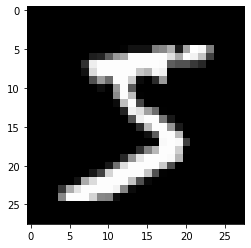

In [4]:
plt.imshow(x_train[0], cmap="gray") # 绘制灰度图

打印第一个样本的输入特征的维度

In [5]:
x_train[0].shape

(28, 28)

打印第一个样本的标签

In [6]:
y_train[0]

5

打印训练测试集样本的维度

In [7]:
x_train.shape

(60000, 28, 28)

打印训练测试集标签的维度

In [8]:
 y_train.shape

(60000,)

打印测试集样本的维度

In [9]:
x_test.shape

(10000, 28, 28)

打印测试集标签的维度

In [10]:
y_test.shape

(10000,)

### 实践：训练 MNIST 数据集

步骤一导入相关模块，以及步骤二导入训练集和测试集在上面均已完成，下面还需要在步骤二的基础上对输入数据进行归一化的处理。之后的其他步骤不变。

In [11]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [12]:
model = tf.keras.models.Sequential([
    # 作为输入特征，输入神经网络时，将数据拉伸为一维数组
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [13]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['sparse_categorical_accuracy'])

In [14]:
model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2622 - sparse_categorical_accuracy: 0.9252 - val_loss: 0.1598 - val_sparse_categorical_accuracy: 0.9528
Epoch 2/5
60000/60000 [==============================] - 4s 75us/sample - loss: 0.1152 - sparse_categorical_accuracy: 0.9657 - val_loss: 0.1075 - val_sparse_categorical_accuracy: 0.9672
Epoch 3/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0786 - sparse_categorical_accuracy: 0.9764 - val_loss: 0.0851 - val_sparse_categorical_accuracy: 0.9751
Epoch 4/5
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0579 - sparse_categorical_accuracy: 0.9827 - val_loss: 0.0772 - val_sparse_categorical_accuracy: 0.9752
Epoch 5/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0449 - sparse_categorical_accuracy: 0.9860 - val_loss: 0.0750 - val_sparse_categorical_accuracy: 0.9776


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  100480    
_________________________________________________________________
dense_1 (Dense)              multiple                  1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


#### 同样的，也可以使用类来实现网络结构

只需修改步骤三，其他步骤不变。

In [16]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Model

In [17]:
class MnistModel(Model):
    def __init__(self):
        super(MnistModel, self).__init__()
        self.flatten = Flatten()
        self.d1 = Dense(128, activation='relu')
        self.d2 = Dense(10, activation='softmax')
    
    def call(self, x):
        x = self.flatten(x)
        x = self.d1(x)
        y = self.d2(x)
        return y

In [18]:
model = MnistModel()

In [19]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['sparse_categorical_accuracy'])

In [20]:
model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2537 - sparse_categorical_accuracy: 0.9264 - val_loss: 0.1456 - val_sparse_categorical_accuracy: 0.9566
Epoch 2/5
60000/60000 [==============================] - 4s 62us/sample - loss: 0.1136 - sparse_categorical_accuracy: 0.9663 - val_loss: 0.1100 - val_sparse_categorical_accuracy: 0.9664
Epoch 3/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0785 - sparse_categorical_accuracy: 0.9762 - val_loss: 0.0835 - val_sparse_categorical_accuracy: 0.9750
Epoch 4/5
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0589 - sparse_categorical_accuracy: 0.9821 - val_loss: 0.0738 - val_sparse_categorical_accuracy: 0.9770
Epoch 5/5
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0441 - sparse_categorical_accuracy: 0.9862 - val_loss: 0.0779 - val_sparse_categorical_accuracy: 0.9746


In [21]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  100480    
_________________________________________________________________
dense_3 (Dense)              multiple                  1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
